In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


df = pd.read_csv('MLTempDataset1.csv', parse_dates=['Datetime'])

In [2]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Hourly_Temp'], dtype='object')

In [3]:
df=df.iloc[:,1:]

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Datetime'][0]

Timestamp('2022-01-04 00:00:00')

In [5]:
df = df.set_index(['Datetime'])

In [6]:
def IQR(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    return iqr,q1,q3

for i in df.columns:
    iqr,q1,q3 = IQR(df,i)
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[i] > lower) & (df[i] < upper)]
def normalize(data,col):
    i = data[col]
    data[col] = (i-min(i))/(max(i)-min(i))
    return data[col]
                 
for i in df.columns:
    df[i] = normalize(df,i)

In [7]:
df.sort_index(inplace=True)

In [8]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_ss = scaler.fit_transform(df)

In [9]:
columns = df.columns
columns

Index(['Hourly_Temp'], dtype='object')

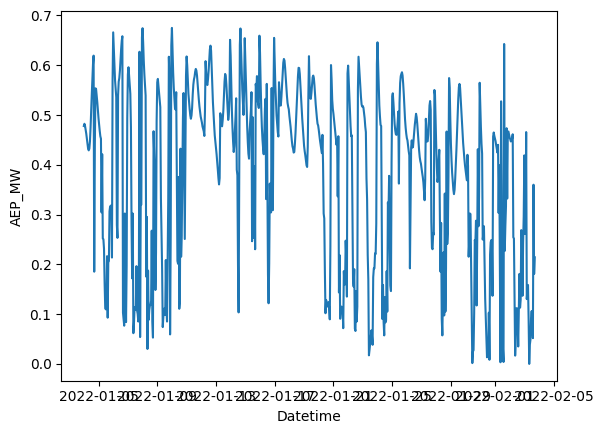

In [10]:
plt.xlabel('Datetime')
plt.ylabel("Hourly_Temp")
plt.plot(df[0:365*2])

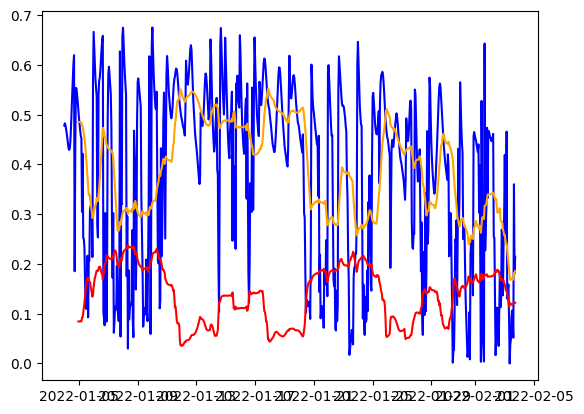

In [11]:
rol_mean = df.rolling(window=24).mean()
rol_sd = df.rolling(window=24).std()

plt.plot(df[0:365*2],c="blue")
plt.plot(rol_mean[0:365*2],c="orange")
plt.plot(rol_sd[0:365*2],c="red")

In [13]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df["Hourly_Temp"])
print(adftest)

(-9.364559335921337, 7.662093176699795e-16, 24, 7019, {'1%': -3.4312819978801934, '5%': -2.8619518683619543, '10%': -2.566989233537464}, -14140.978714353325)


In [14]:
df_new = df["Hourly_Temp"]-df["Hourly_Temp"].shift(2)

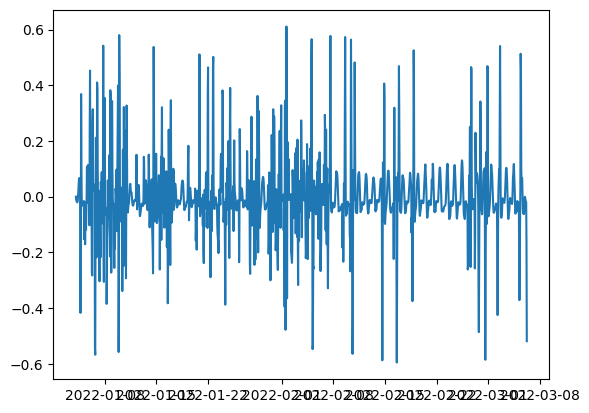

In [15]:
plt.plot(df_new[:365*4])

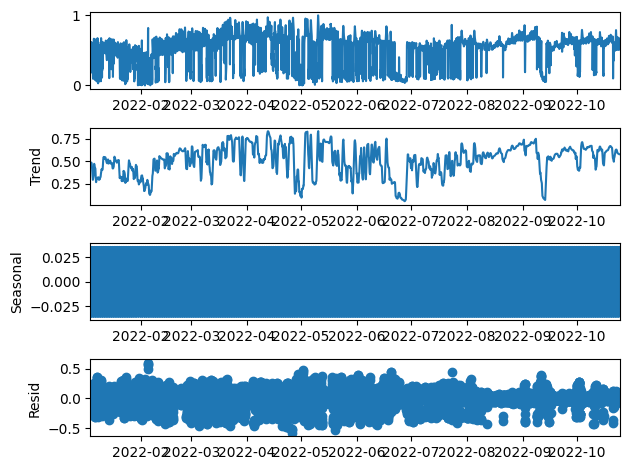

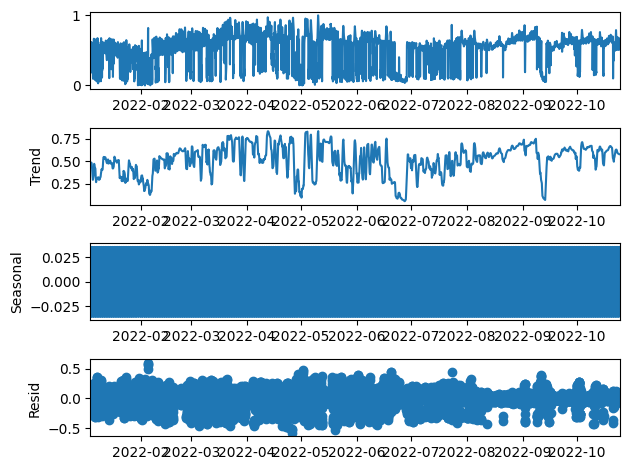

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive', period=24)
result.plot()

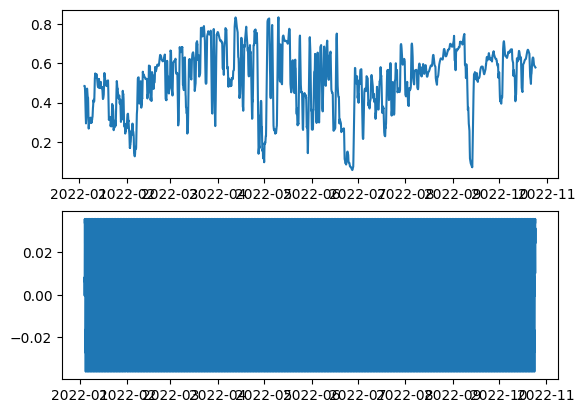

In [17]:
trend=result.trend
season=result.seasonal

plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

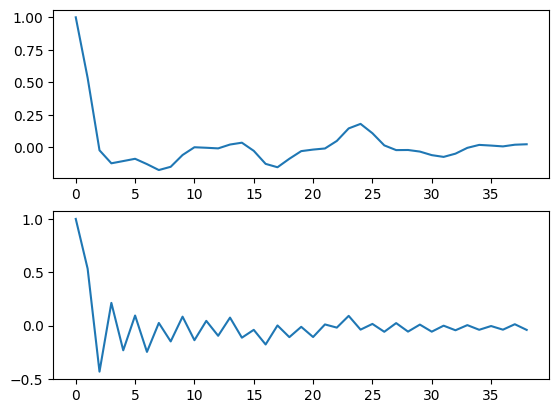

In [18]:
from statsmodels.tsa.stattools import acf, pacf

d_acf = acf(df_new.dropna())
d_pacf = pacf(df_new.dropna())

plt.subplot(211)
plt.plot(d_acf)
plt.subplot(212)
plt.plot(d_pacf)

In [19]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(df,order=(1,0,3))
model=h.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


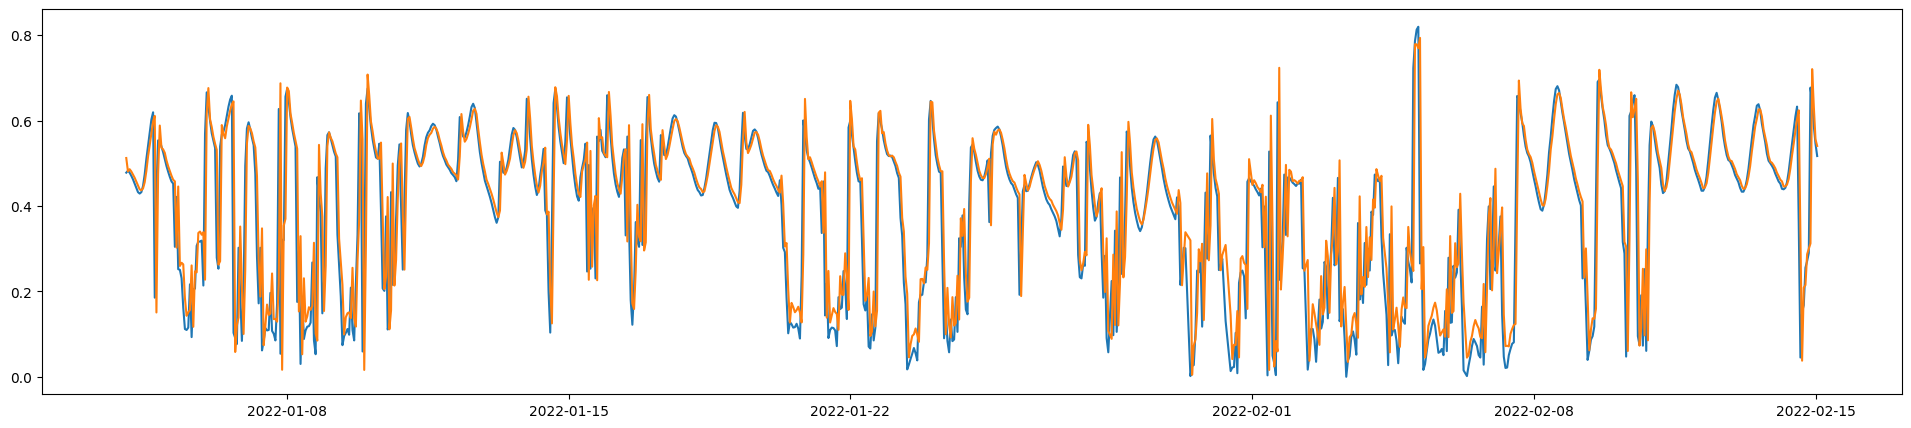

In [20]:
plt.figure(figsize=(24,5))
plt.plot(df[:1000])
plt.plot(model.predict()[:1000])
plt.show()


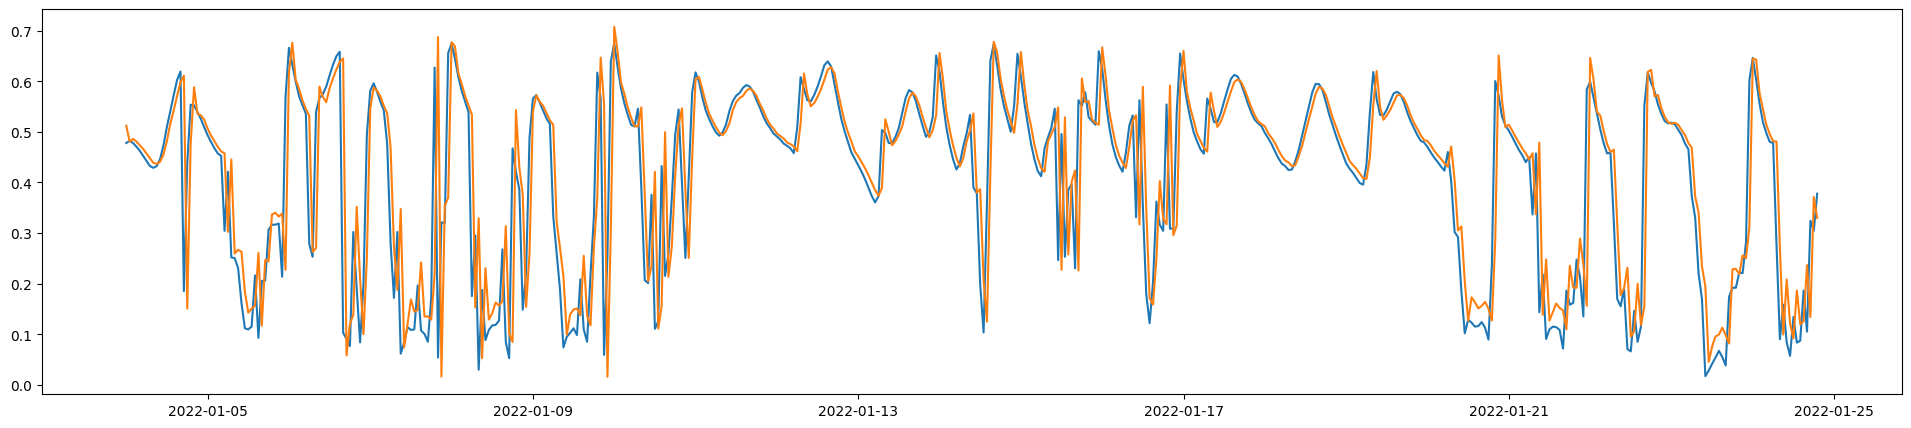

In [30]:
plt.figure(figsize=(24,5))
plt.plot(df[:500])
plt.plot(model.predict()[:500])
plt.show()